In [82]:
import torch
from torch.utils import data

degree=100
example_num=1000
batch_size=10
true_w=torch.ones(size=(degree,))*0.01
true_b=torch.tensor(0.05)

def gen_data(w,b,example_num):
    x=torch.normal(0,1,(example_num,len(w)))
    y=torch.matmul(x,w)+b
    y+=torch.normal(1,2,y.shape)
    return x,y

x,y=gen_data(true_w,true_b,example_num)
test_x,test_y=gen_data(true_w,true_b,example_num)
print(x.shape,y.shape)


def data_iter(dd,batch_size):
    dataset=data.TensorDataset(*dd)
    return data.DataLoader(dataset,batch_size,True)

train_iter=data_iter((x,y),batch_size)
test_iter=data_iter((test_x,test_y),batch_size)
for tx,ty in train_iter:
    print(tx.shape)
    break


torch.Size([1000, 100]) torch.Size([1000])
torch.Size([10, 100])


i:4 train loss:4.276140139579773,ei loss:4.326227430343628
i:9 train loss:4.136406778335571,ei loss:4.028932496070862
i:14 train loss:3.5260518646240233,ei loss:3.7622995519638063
i:19 train loss:4.533679644107819,ei loss:5.089687592029572
i:24 train loss:4.013940505981445,ei loss:4.383837895393372
i:29 train loss:4.239738073348999,ei loss:4.851515197753907
i:34 train loss:4.060336714744568,ei loss:4.502509411811829
i:39 train loss:4.602745166778565,ei loss:5.006158715248108
i:44 train loss:3.8788093938827513,ei loss:3.653410758972168
i:49 train loss:3.6390207557678225,ei loss:4.23235146522522
i:54 train loss:3.7479255857467653,ei loss:4.06767516040802
i:59 train loss:3.9974804005622864,ei loss:4.333318585395813
i:64 train loss:3.639961818695068,ei loss:3.9426858816146853
i:69 train loss:3.9992111835479736,ei loss:4.153955449104309
i:74 train loss:4.309306872367859,ei loss:4.435376631736755
i:79 train loss:3.8206077709198,ei loss:3.967083709716797
i:84 train loss:4.752635281562805,ei l

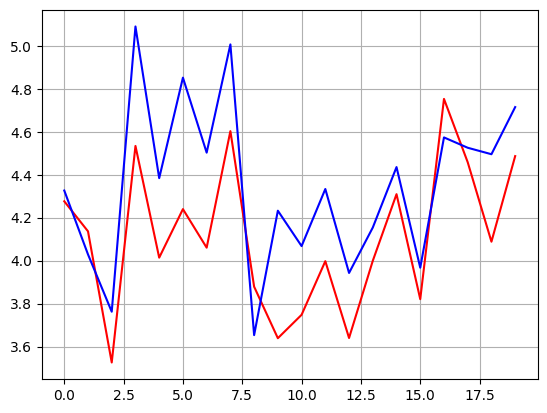

In [83]:
from torch import nn
import matplotlib.pyplot as plt

iw=nn.Parameter(torch.normal(0,1,size=(len(true_w),),requires_grad=True))
ib=nn.Parameter(torch.tensor(1.0,requires_grad=True))


class Accumulator():
    def __init__(self,n):
        self.data=[0.0]*n
    
    def add(self,*args):
        self.data=[ a+ float(b) for a,b in zip(self.data,args)]
    
    def __getitem__(self,index):
        return self.data[index]

epoch_num=100

def net(x):
    return torch.matmul(x,iw)+ib

def loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

def weight_decay(lamd):
    return lamd*torch.sum(iw.pow(2))/2

def eval_data(d_iter):
    metric=Accumulator(2)
    with torch.no_grad():
        for x,y in d_iter:
            y_hat=net(x)
            l=loss(y_hat,y)
            metric.add(l.sum(),len(y))
    return metric[0]/metric[1]

#updater=torch.optim.SGD([iw,ib],lr=0.01,weight_decay=0.1)
updater=torch.optim.SGD([iw,ib],lr=0.01)
def train(lamd):
    traindata=[]
    testdata=[]
    for i in range(epoch_num):
        for tx,ty in train_iter:
            y_hat=net(tx)
            l=loss(y_hat,ty)
            updater.zero_grad()
            l.sum().backward()
            updater.step()
        if (i+1)%5==0:
            ti=eval_data(train_iter)
            ei=eval_data(test_iter)
            print(f'i:{i} train loss:{ti},ei loss:{ei}')
            traindata.append(ti)
            testdata.append(ei)
    return traindata,testdata

traindata,testdata=train(0)
plt.plot(range(len(traindata)),traindata,'r',label='train')
plt.plot(range(len(testdata)),testdata,'b',label="test")
plt.grid()
plt.show()

In [85]:
iw,ib

(Parameter containing:
 tensor([ 0.1856,  0.0877, -0.0015, -0.1204,  0.1652,  0.3957, -0.0549, -0.1623,
         -0.0195, -0.1290,  0.0966,  0.2574, -0.2218,  0.1855,  0.1790, -0.2982,
          0.1691, -0.2183, -0.2204, -0.0651, -0.1056, -0.1361, -0.4318, -0.1292,
          0.0728,  0.4743, -0.1818,  0.2174,  0.4744,  0.0101, -0.0182,  0.0400,
          0.1001, -0.0674,  0.3435, -0.2325, -0.5361,  0.3940,  0.3604,  0.0447,
          0.2371,  0.1227, -0.1068, -0.0912, -0.0327, -0.1528, -0.0701,  0.1072,
         -0.2903,  0.0542,  0.0414,  0.0364,  0.0227, -0.1580,  0.0039, -0.5454,
         -0.0514, -0.1172, -0.1255, -0.2024, -0.5934,  0.3435, -0.1401, -0.5018,
          0.1812, -0.0491,  0.0929, -0.0978, -0.1803, -0.0911, -0.4084, -0.1221,
         -0.3494,  0.2360,  0.3097,  0.1275,  0.0081, -0.0106, -0.0641,  0.3479,
         -0.1709,  0.3271, -0.0973, -0.1037,  0.0628, -0.2179, -0.2163,  0.6107,
          0.0920,  0.0104,  0.0267, -0.4897,  0.2009, -0.1258,  0.1129, -0.0161,
     